In [275]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.optimize as opt
import scipy.signal as sig
import scipy.integrate as sciint
from functools import partial

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Mine
from wilson_cowan_2d.systems.concrete_solvers import UVRK4, WZRK4
from wilson_cowan_2d.systems import concrete_wc_kernel as wck
from wilson_cowan_2d.kernels import decreasing_exponential, Dist1DGrid
from wilson_cowan_2d.kernels.kernels import make_K_2_populations

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [318]:
τe = 1
τi = 0.6 * τe

param = wck.DefaultParams(τ = np.array([τe, τi]), η = 0.1, size = 2**8)
# param.A = np.array([[1, 1.5],[1, 0.25]])
# param.F = lambda x: 1/(1 + np.exp(-50 * x))
param.Θ = np.array([0.125, 0.4])
# param.Θ = np.array([0.125, 0.4])
# param.Θ = np.array([0.1, 0.35])
# param.β = 50

In [365]:
calc_cross_points(param)

array([[4.00000000e-04, 8.20000000e-03, 4.23000000e-02, 9.99000000e-02],
       [3.94700809e-03, 3.96579476e-03, 2.01941257e-01, 9.97201603e-01]])

ValueError: x and y must have same first dimension, but have shapes (10000,) and (2, 1000)

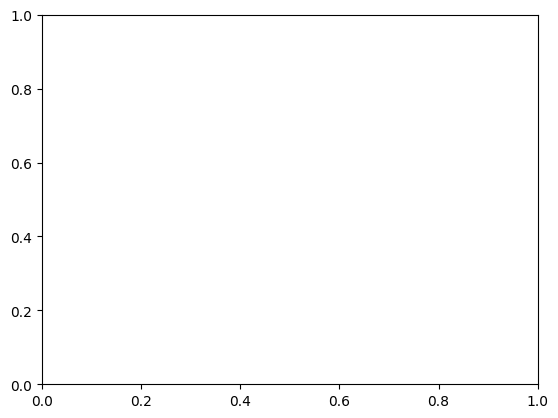

In [424]:
def calc_nulclines_crosspoints(params, interp_prec=1e-3):
    uinterp, vinterp = calc_nulclines(params, interp_prec)
    cps = _find_cross_points(uinterp[0], uinterp[1], vinterp[1])
    return uinterp, vinterp, cps

def calc_cross_points(params, interp_prec=1e-3):
    uinterp, vinterp = calc_nulclines(params, interp_prec)
    return _find_cross_points(uinterp[0], uinterp[1], vinterp[1])

def calc_nulclines(params, interp_prec=1e-3, fit_points=250):
    u_func = partial(_u_min_func, params=params)
    v_func = partial(_v_min_func, params=params)
    
    uus = vvs = np.linspace(0, 1, fit_points)
    uvs = _generate_fits(u_func, uus)
    vus = _generate_fits(v_func, vvs)
    
    tt = np.arange(0, 1, interp_prec)
    nucs = _interpolate_nulclines((uus, uvs), (vus, vvs), tt)
    return tuple(np.stack((tt, n)) for n in nucs)

def _generate_fits(func, rang = np.linspace(0, 1, 250)):
    return [opt.minimize(func, v, args=(v), method='nelder-mead').x[0] for v in rang]

def _interpolate_nulclines(us, vs, interp_range=np.arange(0, 1, 1e-3)):
    return [np.interp(interp_range, ncs[0], ncs[1]) for ncs in (us, vs)]

def _find_cross_points(rang, uinterp, vinterp):
    rr = np.sign(uinterp - vinterp)
    cond = np.where(rr -np.roll(rr,  1) !=0)
    rx = rang[cond]
    vx = vinterp[cond]

    return np.stack([rx, vx])

def _u_min_func(v, u, params):
    return np.abs(param.F(param.A[0,0]*u - param.A[0,1]*v - param.Θ[0]) - u)

def _v_min_func(u, v, params):
    return np.abs(param.F(param.A[1,0]*u - param.A[1,1]*v - param.Θ[1]) - v)

uinterp, vinterp = 

_ = plt.plot(tt, uinterp)
_ = plt.plot(tt, vinterp)
_ = plt.scatter(tx, vx, c='r')
_ = plt.xlim(-0.1,0.6)
_ = plt.ylim(-0.1,0.5)

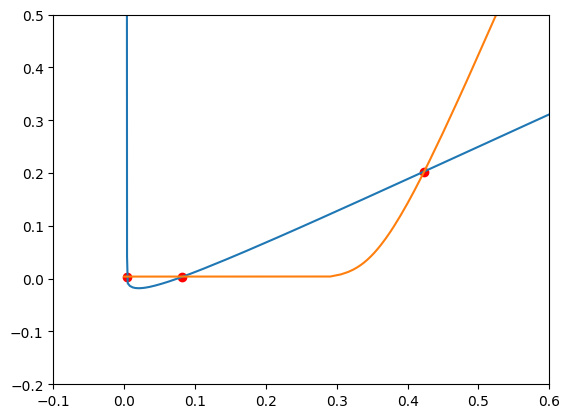

In [420]:
param = wck.DefaultParams(τ = np.array([τe, τi]), η = 0.1, size = 2**8)
# param.A = np.array([[1, 1.5],[1, 0.25]])
# param.F = lambda x: 1/(1 + np.exp(-50 * x))
# param.Θ = np.array([0.15, 0.25])

tus, tvs, cps = calc_nulclines_crosspoints(param)

_ = plt.plot(tus[0], tus[1])
_ = plt.plot(tvs[0], tvs[1])
_ = plt.scatter(cps[0], cps[1], c='r')
_ = plt.xlim(-0.1,0.6)
_ = plt.ylim(-0.2,0.5)

In [421]:
uinterp, vinterp = calc_nulclines(param)

rr = np.sign(uinterp[1] - vinterp[1])
cond1 = np.where(rr -np.roll(rr, -1) !=0)
cond2 = np.where(rr -np.roll(rr,  1) !=0)

rx1 = uinterp[0][cond1]
vx1 = vinterp[1][cond1]

rx2 = uinterp[0][cond2]
vx2 = vinterp[1][cond2]


In [422]:
rx1
vx1

array([0.004, 0.082, 0.423, 0.999])

array([0.00394701, 0.00396579, 0.20194126, 0.9972016 ])

In [423]:
rx2
vx2

array([0.   , 0.005, 0.083, 0.424])

array([0.00394604, 0.00394725, 0.00396604, 0.20470882])

In [411]:
rr

array([ 1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

In [383]:
rang = np.linspace(0,1, 100)
mesh = np.array([
    [min_func(u,v) for u in rang] for v in rang
])

In [104]:
test = (np.argwhere(np.round(mesh, 2) == 0)/100)


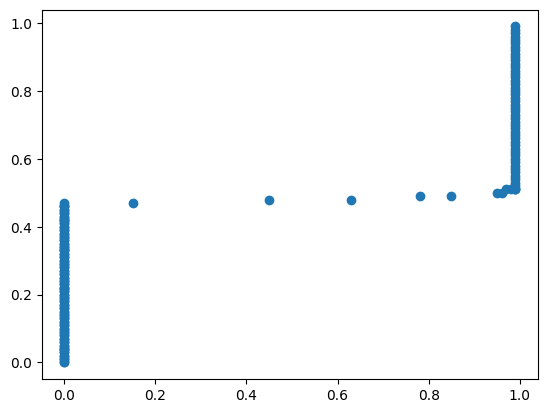

In [106]:
test.sort(axis=0)
x,y = test.T
plt.scatter(y,x)

In [90]:
mesh

array([[1.92673466e-03, 6.91231430e-03, 1.49291782e-02, ...,
        2.02020202e-02, 1.01010101e-02, 0.00000000e+00],
       [9.04181586e-04, 8.60360826e-03, 1.77231607e-02, ...,
        2.02020202e-02, 1.01010101e-02, 0.00000000e+00],
       [4.24085407e-04, 9.39846700e-03, 1.90383948e-02, ...,
        2.02020202e-02, 1.01010101e-02, 0.00000000e+00],
       ...,
       [2.35285567e-35, 1.01010101e-02, 2.02020202e-02, ...,
        9.79797980e-01, 9.89898990e-01, 1.00000000e+00],
       [1.10302236e-35, 1.01010101e-02, 2.02020202e-02, ...,
        9.79797980e-01, 9.89898990e-01, 1.00000000e+00],
       [5.17098580e-36, 1.01010101e-02, 2.02020202e-02, ...,
        9.79797980e-01, 9.89898990e-01, 1.00000000e+00]])

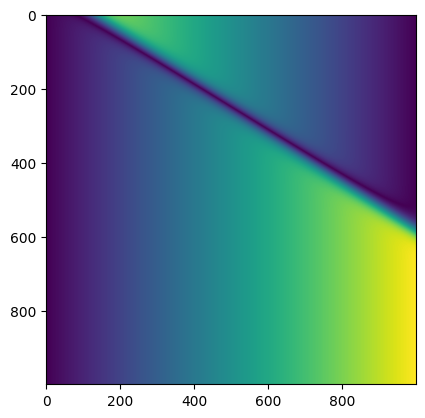

In [53]:
plt.imshow(mesh)

In [26]:
def min_v_for_u(u_val, param):
    def min_func(v):
        return np.abs(param.F(param.A[0,0]*u_val - param.A[0,1]*v - param.Θ[0]) - u_val )
    return min_func

In [34]:
min_v_for_u(0.6, param)(0.2)

0.3998415637808975

In [29]:
def u_nulcline(u_val, param):
    return _min_v_for_u(u_val, param).x[0]

def _min_v_for_u(u_val, param):
    def min_func(v):
        return np.abs(param.F(param.A[0,0]*u_val - param.A[0,1]*v - param.Θ[0]) - u_val )
    return min_func
    
    return opt.minimize(min_func, 0.0)

In [30]:
u_nulc = [u_nulcline(x, param) for x in np.linspace(0,1,100)]

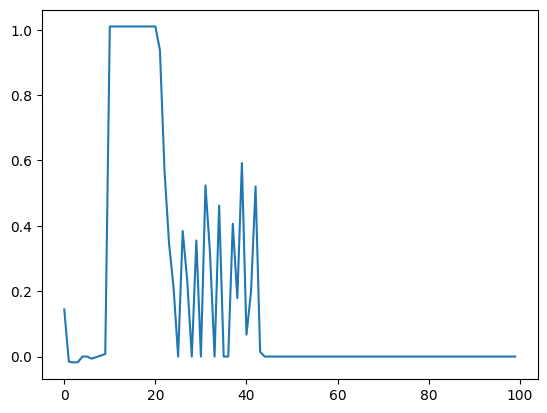

In [31]:
plt.plot(u_nulc)